<a href="https://colab.research.google.com/github/rawatpremsingh999/Propulsion-Plants-Decay-Evaluation/blob/master/Propulsion_Plants_Decay_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [123]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [154]:
# fixed decimal point format for numpy array
np.set_printoptions(formatter={'float_kind':"{:.4f}".format})

**Reading Data from github**

In [124]:
url = "https://raw.githubusercontent.com/rawatpremsingh999/Propulsion-Plants-Decay-Evaluation/master/propulsion.csv"
df = pd.read_csv(url,index_col=["Unnamed: 0"])

In [125]:
df.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [126]:
df.shape

(10000, 18)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lever position (lp) [ ]                        10000 non-null  float64
 1   Ship speed (v) [knots]                         10000 non-null  float64
 2   Gas Turbine shaft torque (GTT) [kN m]          10000 non-null  float64
 3   Gas Turbine rate of revolutions (GTn) [rpm]    10000 non-null  float64
 4   Gas Generator rate of revolutions (GGn) [rpm]  10000 non-null  float64
 5   Starboard Propeller Torque (Ts) [kN]           10000 non-null  float64
 6   Port Propeller Torque (Tp) [kN]                10000 non-null  float64
 7   HP Turbine exit temperature (T48) [C]          10000 non-null  float64
 8   GT Compressor inlet air temperature (T1) [C]   10000 non-null  float64
 9   GT Compressor outlet air temperature (T2) [C]  1000

**Note**

*   18 total columns, 10000 samples 
*   None of the columns have Null values



In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lever position (lp) [ ],10000.0,5.150075,2.624015e+00,1.138,3.14400,5.1400,7.14800,9.300
Ship speed (v) [knots],10000.0,14.951400,7.740467e+00,3.000,9.00000,15.0000,21.00000,27.000
Gas Turbine shaft torque (GTT) [kN m],10000.0,27100.647714,2.206278e+04,253.547,8375.79150,21630.1335,39000.71025,72783.338
Gas Turbine rate of revolutions (GTn) [rpm],10000.0,2131.151788,7.722117e+02,1307.675,1386.75800,1924.3250,2678.07800,3560.741
Gas Generator rate of revolutions (GGn) [rpm],10000.0,8194.182366,1.090569e+03,6589.002,7056.52050,8480.5270,9132.13250,9797.103
Starboard Propeller Torque (Ts) [kN],10000.0,225.957785,1.997379e+02,5.304,60.31700,175.2640,332.36000,645.249
Port Propeller Torque (Tp) [kN],10000.0,225.957785,1.997379e+02,5.304,60.31700,175.2640,332.36000,645.249
HP Turbine exit temperature (T48) [C],10000.0,734.476178,1.730092e+02,444.731,589.84100,705.3510,833.15475,1115.797
GT Compressor inlet air temperature (T1) [C],10000.0,288.000000,0.000000e+00,288.000,288.00000,288.0000,288.00000,288.000
GT Compressor outlet air temperature (T2) [C],10000.0,645.748980,7.248304e+01,540.999,577.98075,636.8000,693.65675,789.094


**Note here**


*   GT Compressor inlet air temperature and GT Compressor inlet air pressure variables are constant because minimum nad maximum point is equal. 
*   GT Compressor decay state coefficient: interval [0.950,1.000]
*   GT Turbine decay state coefficient: interval [0.987455,1.000]



**Correlation Analysis using Heatmap**

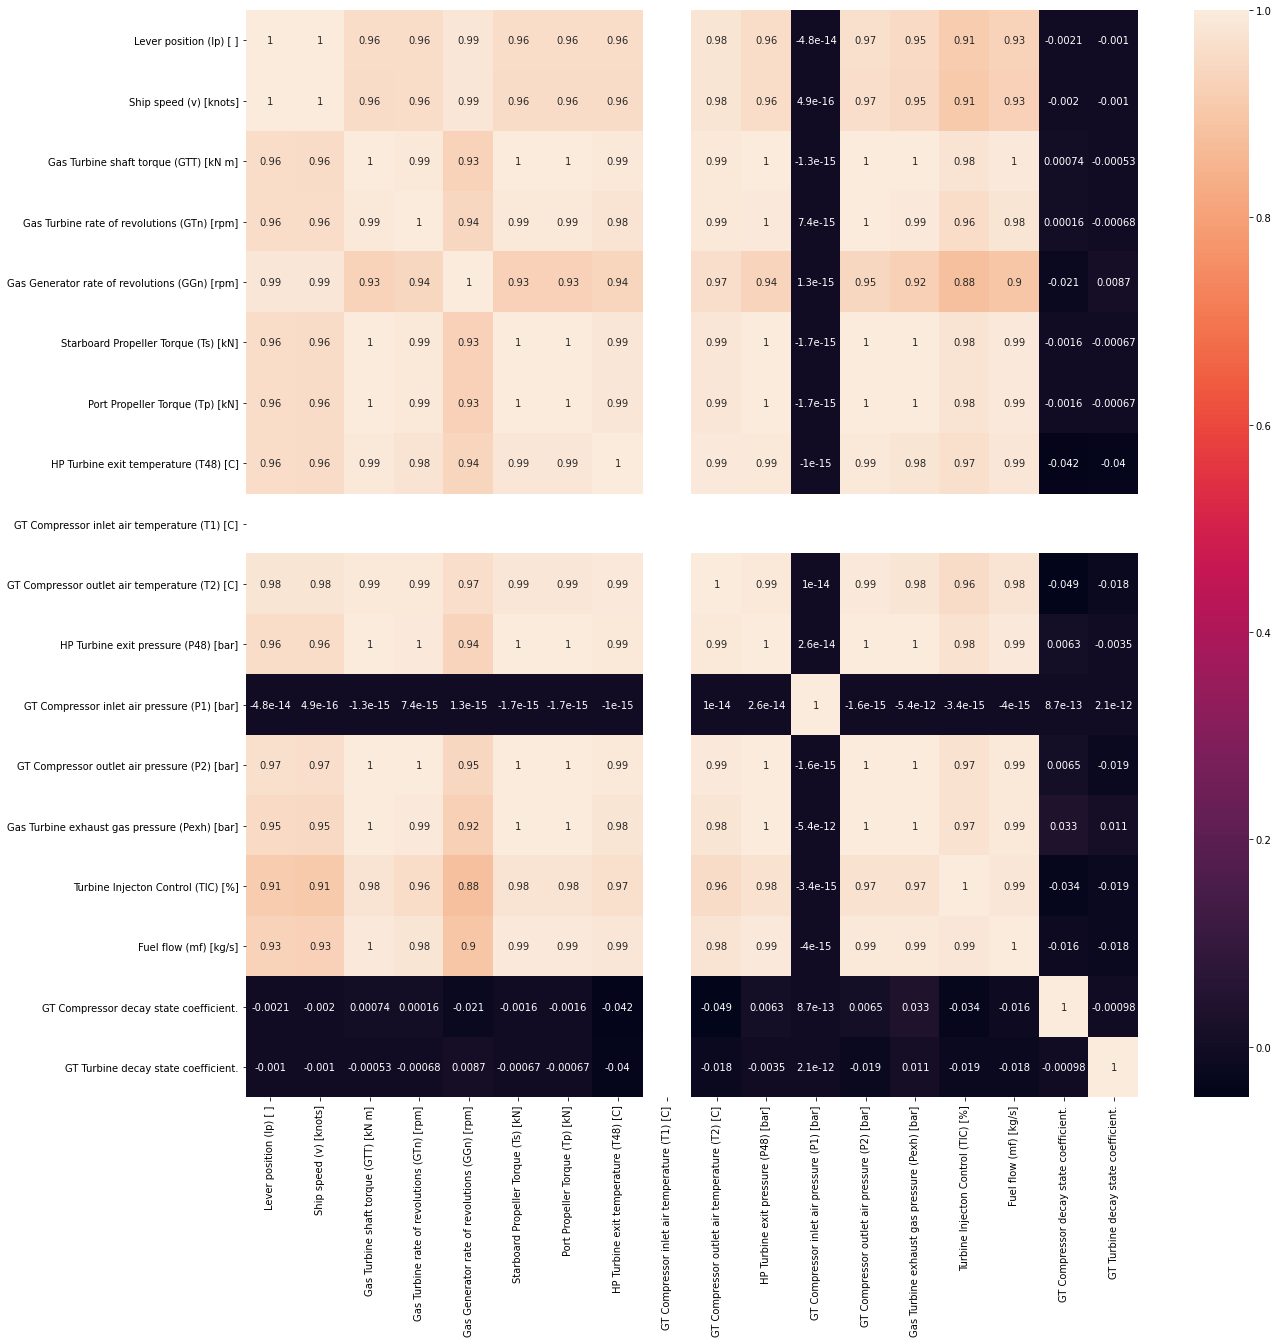

In [129]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Analyse from Correlation heat map**


*   Lever position and Ship speed is strongly correlated.
*   GT Compressor inlet air temperature and GT Compressor inlet air pressure variables are not useful.



## Predict GT Compressor decay state coefficient

In [130]:
df.columns

Index(['Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor inlet air pressure (P1) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient.',
       'GT Turbine decay state coefficient.'],
      dtype='object')

In [131]:
X = df.drop(columns=['GT Compressor decay state coefficient.'])
y = df.iloc[:,-2]

**Check Feature Importance using Extra Tree Regressor**

In [132]:
from sklearn.ensemble import ExtraTreesRegressor
model_etr = ExtraTreesRegressor()
model_etr.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [133]:
important_feature = [round(x,5) for x in model_etr.feature_importances_]
important_feature

[0.01181,
 0.01317,
 0.08145,
 0.04031,
 0.18033,
 0.02787,
 0.02888,
 0.05313,
 0.0,
 0.19828,
 0.07276,
 0.0,
 0.02519,
 0.18049,
 0.03015,
 0.02788,
 0.02829]

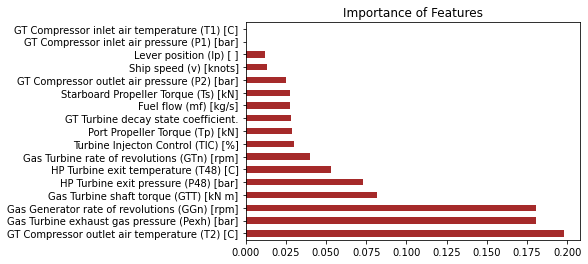

In [135]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color='brown')
plt.title('Importance of Features')
plt.show()

In [136]:
# removing unimportant feature
df_for_Compressor = df.drop(columns = ['GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor inlet air pressure (P1) [bar]'])
df_for_Compressor.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,780.304,4.523,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,665.511,2.518,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,580.587,1.392,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,576.565,1.390,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,663.682,2.518,13.374,1.031,34.154,0.676,0.998,0.980


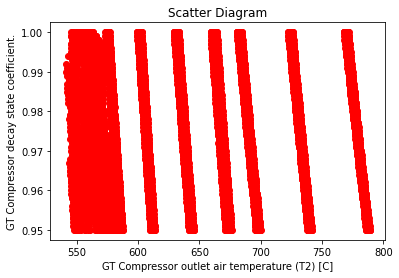

In [137]:
plt.scatter(df_for_Compressor.iloc[:,8],df_for_Compressor.iloc[:,-2],color='red')
plt.xlabel(df_for_Compressor.columns[8])
plt.ylabel(df_for_Compressor.columns[-2])
plt.title("Scatter Diagram")
plt.show()

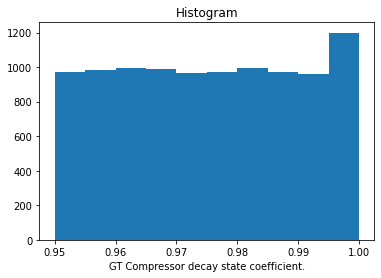

In [138]:
plt.hist(df_for_Compressor.iloc[:,-2])
plt.xlabel(df_for_Compressor.columns[-2])
plt.title("Histogram")
plt.show()

### Applying Stats OLS model

In [139]:
# stats library for statistical analysis
import statsmodels.api as sm
from scipy import stats

In [140]:
# formatting multiple linear regression model
X = df_for_Compressor.drop(columns=['GT Compressor decay state coefficient.'])
y = df_for_Compressor.iloc[:,-2]
z = sm.add_constant(X) 
model = sm.OLS(y,z).fit()
print(model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     GT Compressor decay state coefficient.   R-squared:                       0.902
Model:                                                OLS   Adj. R-squared:                  0.901
Method:                                     Least Squares   F-statistic:                     6534.
Date:                                    Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                                            08:11:45   Log-Likelihood:                 39580.
No. Observations:                                   10000   AIC:                        -7.913e+04
Df Residuals:                                        9985   BIC:                        -7.902e+04
Df Model:                                              14                                         
Covariance Type:                                nonrobust                                         
          

In [141]:
# finding residuals
E = model.resid_pearson
E

array([-0.26583088,  1.50101693, -0.51428116, ...,  1.15933675,
        1.00369501,  0.22953685])

In [143]:
# predict output varible using input variables
y_hat = model.predict(z)
y_hat[:5]

0    0.974230
1    0.988057
2    0.982379
3    0.985328
4    0.993742
dtype: float64

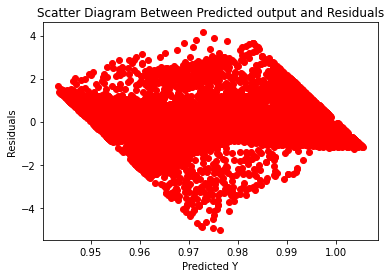

In [144]:
plt.scatter(y_hat,E,color='red')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.title("Scatter Diagram Between Predicted output and Residuals")
plt.show()

### Linear Regression Model

In [145]:
# Importing some necessary libraries
from sklearn.model_selection import train_test_split # use for splitting data into train and test
from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # Performance measure of model

In [146]:
# Split Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 15) (2000, 15) (8000,) (2000,)


In [148]:
# setting intercept as true
reg = LinearRegression(fit_intercept = True)

In [150]:
# fit the model
model_lin1 = lgr.fit(X_train,y_train)

In [155]:
# print all coeficients of regression model
model_lin1.coef_

array([0.2634, -0.0675, 0.0000, 0.0001, 0.0001, -0.0018, -0.0018, -0.0011,
       -0.0031, 0.3203, -0.0715, 2.2130, -0.0011, 0.7877, -1.5906])

In [156]:
# print intercept
model_lin1.intercept_

1.782003011912665

In [157]:
# predicting model on test data
car_predictions_lin1 = model_lin1.predict(X_test)

In [158]:
# R Squared Value
r2_lin_train1 = model_lin1.score(X_train,y_train)
r2_lin_test1 = model_lin1.score(X_test,y_test)
print('R2 for Train Data',r2_lin_train1)
print('R2 for Test Data', r2_lin_test1)

R2 for Train Data 0.9024885066541528
R2 for Test Data 0.8976870030885855


In [159]:
print('MAE:', mean_absolute_error(y_test, car_predictions_lin1))
print('MSE:', mean_squared_error(y_test, car_predictions_lin1))
print('RMSE:', np.sqrt(mean_squared_error(y_test, car_predictions_lin1)))
print('R2 Score:', r2_score(y_test, car_predictions_lin1))

MAE: 0.0033427003323993737
MSE: 2.170623063907267e-05
RMSE: 0.004658994595304084
R2 Score: 0.8976870030885855


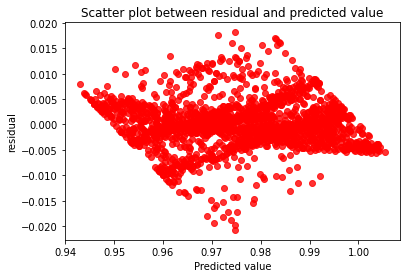

In [160]:
# Residuals plot
residual1  = y_test - car_predictions_lin1
sns.regplot(x = car_predictions_lin1, y = residual1,scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted value')
plt.ylabel('residual')
plt.title('Scatter plot between residual and predicted value')
plt.show()

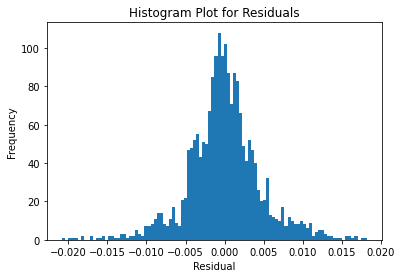

In [161]:
plt.hist(residual1,bins=100)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram Plot for Residuals')
plt.show()

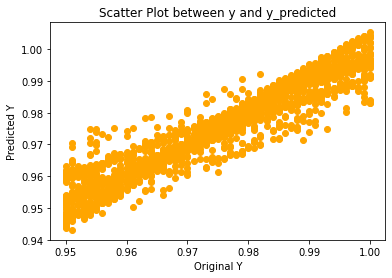

In [162]:
plt.scatter(y_test,car_predictions_lin1,c='orange')
plt.xlabel('Original Y')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot between y and y_predicted')
plt.show()

## Random Forest

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

#### Search best parameters

In [164]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 30, num = 3)]

# Minimum number of samples required to split a node
min_samples_split = [10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5,10]

In [165]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 25, 30], 'min_samples_split': [10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [166]:
# Random search of parameters, using 5 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [167]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25, total=   4.7s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25, total=   4.7s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25, total=   4.6s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25, total=   4.6s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25, total=   4.7s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25, total=   4.0s
[CV] n_estimators=100, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [176]:
parameters = rf_random.best_params_
parameters

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 600}

In [178]:
parameters['max_depth']

20

#### Train the model

In [179]:
# again construct random forest regression model using above parameter
rf = RandomForestRegressor(max_depth= parameters['max_depth'],
                           max_features= parameters['max_features'],
                           min_samples_leaf= parameters['min_samples_leaf'],
                           min_samples_split= parameters['min_samples_split'],n_estimators= parameters['n_estimators'])
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [207]:
y_pred = rf.predict(X_test)

In [208]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 0.0006262932935074681
MSE: 1.0324994457976648e-06
RMSE: 0.001016119798939901
R2 Score: 0.9951332815740574


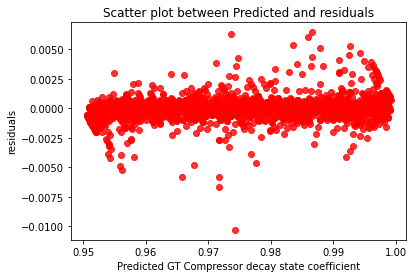

In [209]:
# Residuals plot
residuals  = y_test - y_pred
sns.regplot(x = y_pred, y = residuals,scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted GT Compressor decay state coefficient')
plt.ylabel('residuals')
plt.title('Scatter plot between Predicted and residuals')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


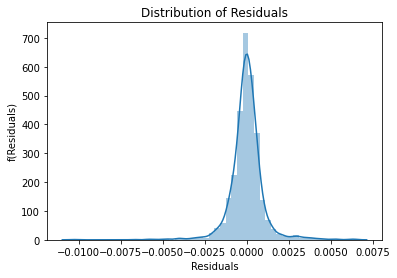

In [210]:
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('f(Residuals)')
plt.title('Distribution of Residuals')
plt.show()

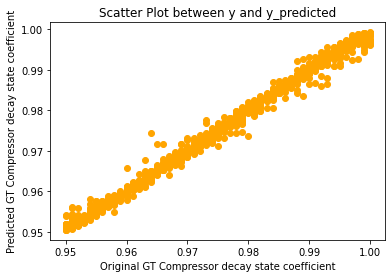

In [211]:
plt.scatter(y_test,y_pred,c='orange')
plt.xlabel('Original GT Compressor decay state coefficient')
plt.ylabel('Predicted GT Compressor decay state coefficient')
plt.title('Scatter Plot between y and y_predicted')
plt.show()

## Deep Learning Neural Network

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.0


In [ ]:
normalizer = preprocessing.Normalization()

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(16, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(4, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dl_model = build_and_compile_model(normalizer)

In [ ]:

%%time
history = dl_model.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=1, epochs=200)

Epoch 1/200
200/200 [==============================] - 0s 2ms/step - loss: 41128144.0000 - val_loss: 242233.9062
Epoch 2/200
200/200 [==============================] - 0s 1ms/step - loss: 6798662.0000 - val_loss: 4804.7505
Epoch 3/200
200/200 [==============================] - 0s 1ms/step - loss: 2183803.2500 - val_loss: 0.7778
Epoch 4/200
200/200 [==============================] - 0s 1ms/step - loss: 522240.8750 - val_loss: 0.7734
Epoch 5/200
200/200 [==============================] - 0s 1ms/step - loss: 245920.5625 - val_loss: 0.7640
Epoch 6/200
200/200 [==============================] - 0s 1ms/step - loss: 190234.7656 - val_loss: 0.7561
Epoch 7/200
200/200 [==============================] - 0s 1ms/step - loss: 112762.3672 - val_loss: 0.7471
Epoch 8/200
200/200 [==============================] - 0s 1ms/step - loss: 97455.7188 - val_loss: 0.7422
Epoch 9/200
200/200 [==============================] - 0s 1ms/step - loss: 69400.5312 - val_loss: 0.7359
Epoch 10/200
200/200 [==============

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [output]')
  plt.legend()
  plt.grid(True)

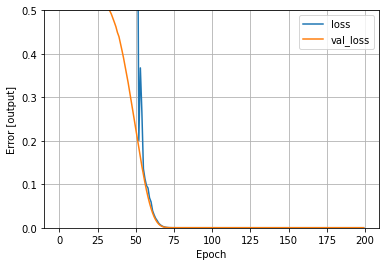

In [ ]:
plot_loss(history)

In [ ]:
dl_model.evaluate(X_test,y_test, verbose=0)

0.00021221590577624738

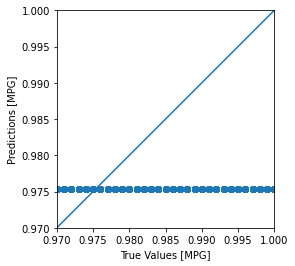

In [ ]:
test_predictions = dl_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0.97,1.00]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
test_predictions

array([0.9753403, 0.9753403, 0.9753403, ..., 0.9753403, 0.9753403,
       0.9753403], dtype=float32)

In [ ]:
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_predictions)))
print('R2 Score:', r2_score(y_test, test_predictions))

MAE: 0.012548465828418736
MSE: 0.0002122158310194705
RMSE: 0.014567629560758006
R2 Score: -0.0002859558934436013


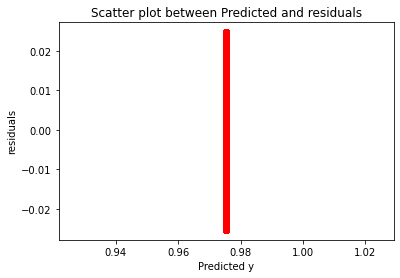

In [ ]:
# Residuals plot
residuals  = y_test - test_predictions
sns.regplot(x = test_predictions, y = residuals,scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted y')
plt.ylabel('residuals')
plt.title('Scatter plot between Predicted and residuals')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


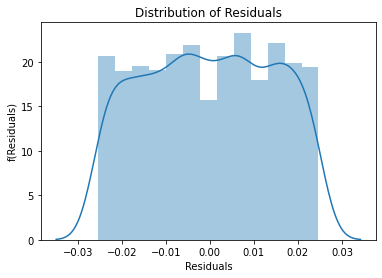

In [ ]:
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('f(Residuals)')
plt.title('Distribution of Residuals')
plt.show()

## Conclusion

*   DL neural network is not good becuase it always trained and converge to a constant value where RMSE error is minimum. for each input it predict same value.
*   Random Forest model is better because its root mean square is minimum and better mean absolute error



## **Predict GT Turbine decay state coefficient**

In [ ]:
df.columns

Index(['Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor inlet air pressure (P1) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient.',
       'GT Turbine decay state coefficient.'],
      dtype='object')

In [ ]:
X = df.drop(columns=['GT Turbine decay state coefficient.'])
y = df.iloc[:,-1]

### Feature Selection

In [ ]:
model_etr = ExtraTreesRegressor()
model_etr.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
important_feature = [round(x,5) for x in model_etr.feature_importances_]
important_feature

[0.0097,
 0.01112,
 0.06628,
 0.05444,
 0.12479,
 0.0207,
 0.02034,
 0.05508,
 0.0,
 0.02764,
 0.033,
 0.0,
 0.33441,
 0.0405,
 0.0738,
 0.0856,
 0.0426]

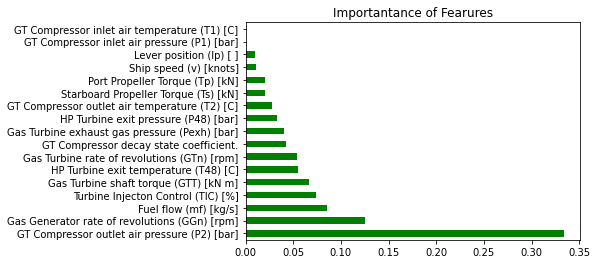

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color='green')
plt.title('Importantance of Fearures')
plt.show()

In [ ]:
# removing unimportant feature
df_for_Turbine = df.drop(columns = ['GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor inlet air pressure (P1) [bar]'])
df_for_Turbine.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,780.304,4.523,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,665.511,2.518,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,580.587,1.392,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,576.565,1.390,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,663.682,2.518,13.374,1.031,34.154,0.676,0.998,0.980


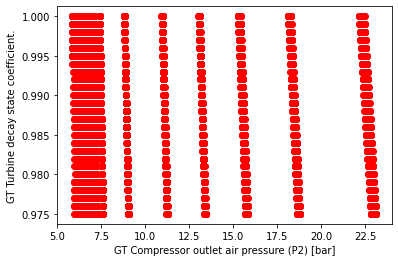

In [ ]:
plt.scatter(df_for_Turbine.iloc[:,10],df_for_Turbine.iloc[:,-1],color='red')
plt.xlabel(df_for_Turbine.columns[10])
plt.ylabel(df_for_Turbine.columns[-1])
plt.show()

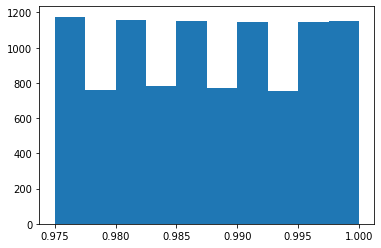

In [ ]:
plt.hist(df_for_Turbine.iloc[:,-1])
plt.show()

## Applying OLS model

In [ ]:
X = df_for_Turbine.drop(columns=['GT Turbine decay state coefficient.'])
y = df_for_Turbine.iloc[:,-1]
z = sm.add_constant(X)
model = sm.OLS(y,z).fit()
print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     GT Turbine decay state coefficient.   R-squared:                       0.944
Model:                                             OLS   Adj. R-squared:                  0.944
Method:                                  Least Squares   F-statistic:                 1.212e+04
Date:                                 Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                                         07:08:24   Log-Likelihood:                 49176.
No. Observations:                                10000   AIC:                        -9.832e+04
Df Residuals:                                     9985   BIC:                        -9.821e+04
Df Model:                                           14                                         
Covariance Type:                             nonrobust                                         
                                        

In [ ]:
Error = model.resid_pearson
Error

array([ 0.54878809,  0.40289258, -0.64785872, ...,  0.31867226,
        0.22144641,  0.50615   ])

In [ ]:
y_hat = model.predict(z)
y_hat[:5]

0    0.977028
1    0.974286
2    0.979148
3    0.998044
4    0.980420
dtype: float64

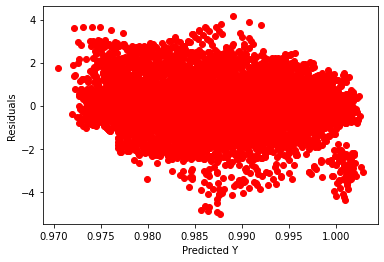

In [ ]:
plt.scatter(y_hat,E,color='red')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.show()

## Linear Regression Model

In [ ]:
# Split Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 15) (2000, 15) (8000,) (2000,)


In [ ]:
# setting intercept as true
lgr = LinearRegression(fit_intercept = True)

In [ ]:
# fit the model
model_lin1 = lgr.fit(X_train,y_train)

In [ ]:
# predicting model on test data
car_predictions_lin1 = model_lin1.predict(X_test)

In [ ]:
# R Squared Value
r2_lin_train1 = model_lin1.score(X_train,y_train)
r2_lin_test1 = model_lin1.score(X_test,y_test)
print('R2 for Train Data',r2_lin_train1)
print('R2 for Test Data', r2_lin_test1)

R2 for Train Data 0.9440032236732799
R2 for Test Data 0.9459138596781372


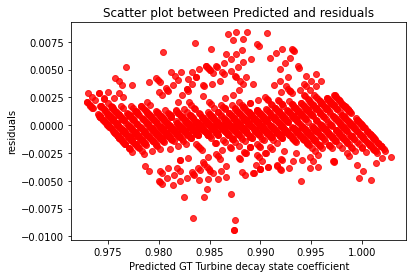

In [ ]:
# Residuals plot
residuals  = y_test - car_predictions_lin1
sns.regplot(x = car_predictions_lin1, y = residuals,scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted GT Turbine decay state coefficient')
plt.ylabel('residuals')
plt.title('Scatter plot between Predicted and residuals')
plt.show()

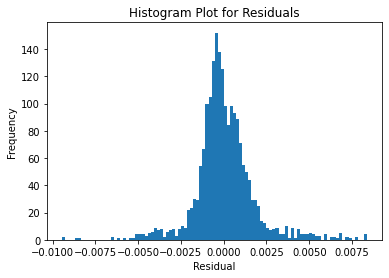

In [ ]:
plt.hist(residuals,bins=100)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram Plot for Residuals')
plt.show()

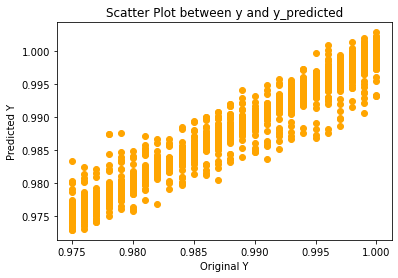

In [ ]:
plt.scatter(y_test,car_predictions_lin1,c='orange')
plt.xlabel('Original Y')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot between y and y_predicted')
plt.show()

## Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,5,10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10,15,20]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10, 15, 20]}


In [ ]:
# Random search of parameters, using 5 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  37.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  37.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  37.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  37.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  37.8s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=  21.7s
[CV] n_estimators=500, min_samples_split=100, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 18.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 400}

In [ ]:
rf_random.best_score_

-1.0576554604352913e-06

In [ ]:
y_pred = rf_random.predict(X_test)

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 0.0005395274691257808
MSE: 9.199374636035074e-07
RMSE: 0.0009591337047583655
R2 Score: 0.9837112958921048


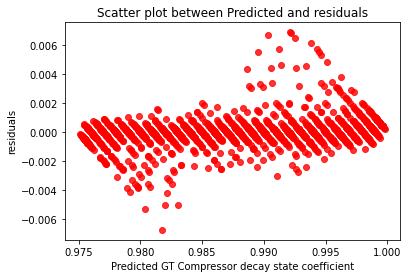

In [ ]:
# Residuals plot
residuals  = y_test - y_pred
sns.regplot(x = y_pred, y = residuals,scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted GT Compressor decay state coefficient')
plt.ylabel('residuals')
plt.title('Scatter plot between Predicted and residuals')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


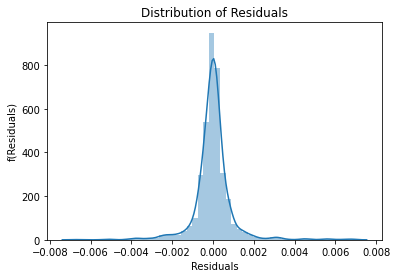

In [ ]:
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('f(Residuals)')
plt.title('Distribution of Residuals')
plt.show()

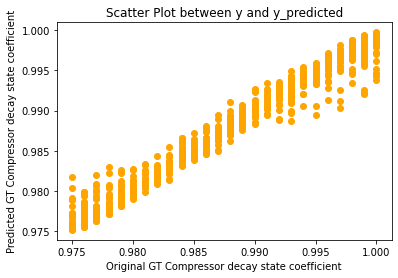

In [ ]:
plt.scatter(y_test,y_pred,c='orange')
plt.xlabel('Original GT Compressor decay state coefficient')
plt.ylabel('Predicted GT Compressor decay state coefficient')
plt.title('Scatter Plot between y and y_predicted')
plt.show()

## Conclusion

*   Random forest is better model to predict GT Compressor decay state coefficient because it give minimal RMSE (0.000959) and mean absoulute error (0.0005395) with high R2 score (0.9837).

